<a href="https://colab.research.google.com/github/decarvalho33/Projetos_IRIS/blob/master/iris_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Agora vamos fazer a mineração de um texto e extrair palavras chaves:

In [ ]:
url= 'https://link.springer.com/search?query=&search-within=Journal&facet-journal-id=10459'

Importamos algumas bibliotecas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



In [ ]:
text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<!--[if lt IE 7]> <html lang="en" class="no-js ie6 lt-ie10 lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 7]>    <html lang="en" class="no-js ie7 lt-ie10 lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>    <html lang="en" class="no-js ie8 lt-ie10 lt-ie9"> <![endif]-->
<!--[if IE 9]>    <html lang="en" class="no-js ie9 lt-ie10"> <![endif]-->
<!--[if gt IE 9]><!--> <html lang="en" class="no-js"> <!--<![endif]-->
<head>
  <meta charset="UTF-8"/>
  <meta name="description" content=""/>
  <meta name="author" content=""/>
  <meta name="viewport" content="width=device-width, minimum-scale=1, maximum-scale=1"/>
  <meta name="format-detection" content="telephone=no"/>
  <meta name="robots" content="noindex,follow"/>
  <!--[if (gt IE 8) | (IEMobile)]><!--> <link rel="stylesheet" media="screen" href="/static/39f3d2d1514b21a27ccde4e7c0fd67e30f6fa6e8/css/modern_link.min.css"> <!--<![endif]-->
  <!--[if (lt IE 9) & (!IEMobile)]> <link rel="stylesheet" media="screen" href="/static/39f3d2d1514b21a

Convertemos a linguagem de marcação html em um texto simples usando o objeto HTMLParser. 

In [ ]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:100])

NameError: ignored

Vamos extrair os insights, ou seja as palavras-chave mais significativas usando a biblioteca RAKE. 

In [ ]:
import sys
!{sys.executable} -m pip install nlp_rake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Definiremos o comprimento mínimo de uma palavra-chave para 5 caracteres, a frequência mínima de uma palavra-chave no documento para 3 e o número máximo de palavras em uma palavra-chave para 2.

In [ ]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('medical education', 4.0),
 ('download pdf', 3.9333333333333336),
 ('students', 1.25),
 ('advances', 1.0476190476190477),
 ('number', 1.0),
 ('enter', 1.0),
 ('e-learning', 1.0)]

In [ ]:
!{sys.executable} -m pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


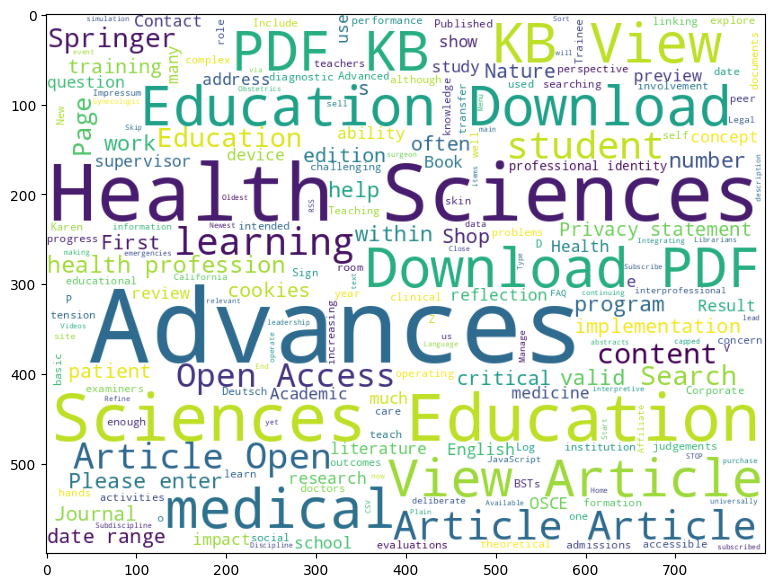

In [ ]:


wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))